# Language Modeling using OpenGRM

- Language Understanding Systems
- Evgeny A. Stepanov
- stepanov.evgeny.a@gmail.com

## 0. Requirements

- [OpenFST](http://www.openfst.org/twiki/bin/view/FST/WebHome)
- [OpenGRM](http://www.opengrm.org/twiki/bin/view/GRM/NGramLibrary)
- [NL2SparQL4NLU](https://github.com/esrel/NL2SparQL4NLU) dataset

## 1. Language Modeling Tools

### 1.1. Language Model Functionality

- Compute n-gram counts from the corpus
- Train LM from the n-gram counts file
- Calculate the test data *perplexity* using LM

<div>
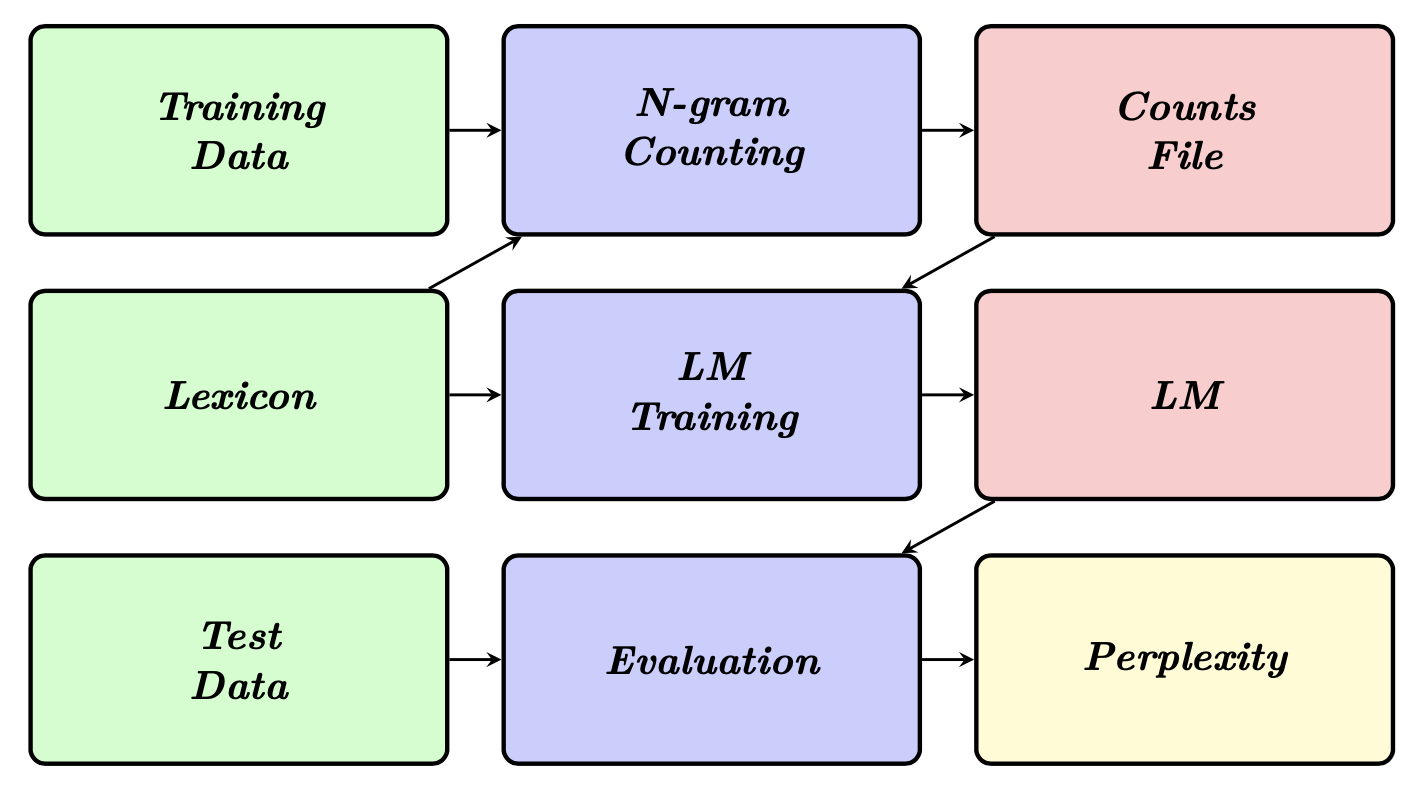
</div>

### 1.2. OpenGRM NGram Library

This functionaly has been implemented in [OpenGRM NGram Library](http://www.opengrm.org/twiki/bin/view/GRM/NGramLibrary) as following commands (blue boxes):

<div>
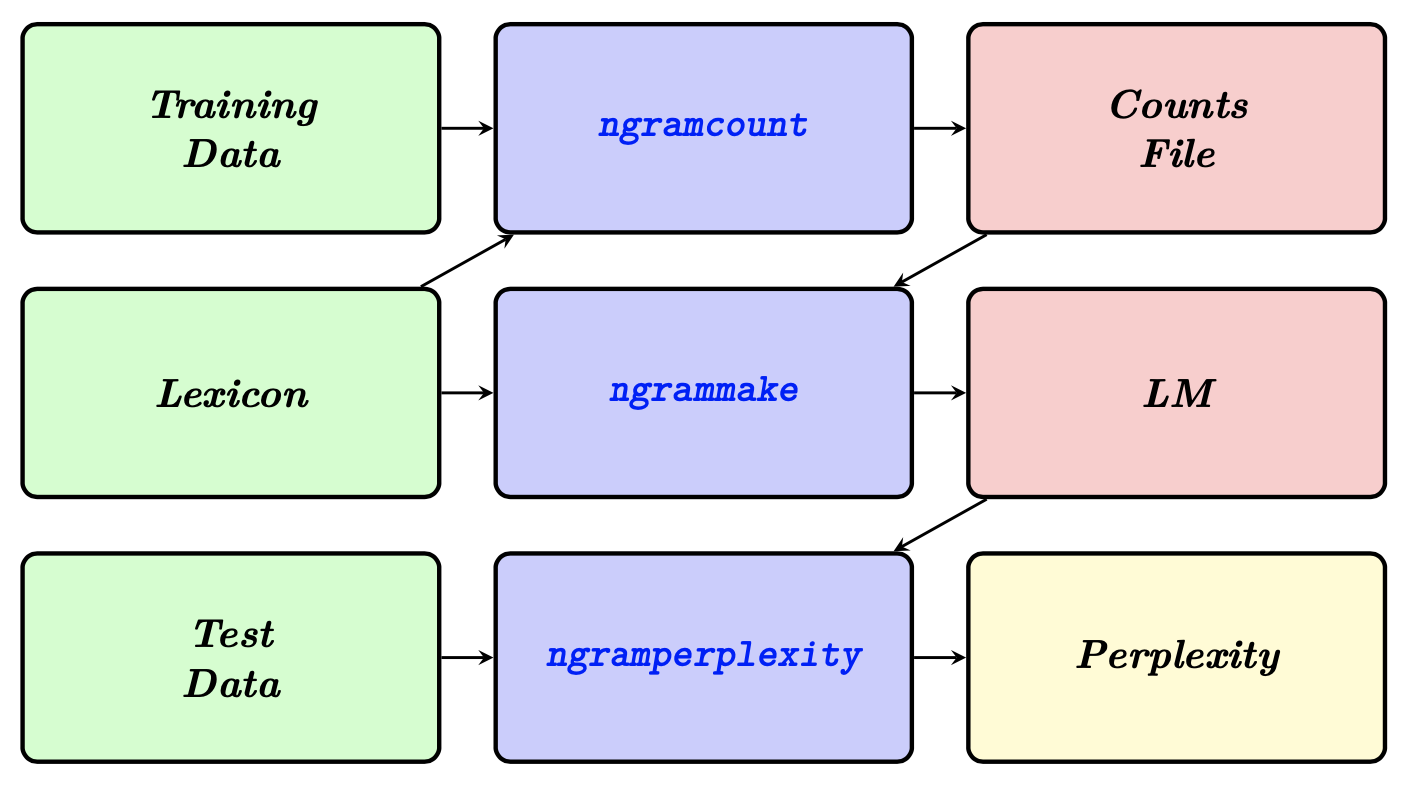
</div>

#### Command-line Tools

| Command             | Description         |
|:--------------------|:--------------------|
| `ngramcount`        | takes as input a <span style="color: red;">*fst archive*</span>  representing a text input and outputs an *fst* representing counts of n-grams
| `ngrammake`         | takes as input a *counts fst* (the output of `ngramcount`) and outputs an *fst* representing a n-gram back-off stochastic LM
| `ngrammerge`        | merges two *counts fsts* (the output of `ngramcount`) or two *LMs* (the output of `ngrammake`)
| `ngramapply`        | intersects *n-gram model* with <span style="color: red;">*fst archive*</span>
| `ngramperplexity`   | calculate perplexity of input corpus from model
| `ngramsymbols`      | produces a lexicon from an input text corpus
| `ngramread`         | utility to read n-gram models from text file
| `ngramprint`        | utility to write n-gram models to text file

Read documentation [here](http://www.opengrm.org/twiki/bin/view/GRM/NGramQuickTour#AvailableOperations) for other available operations.

### 1.3. FAR Tools

__FARs__ -- *weighted  finite-state  machines  archives* -- a concatentation of the file representation of one or more finite-state machines.  

Commands:

| Command             | Description         |
|:--------------------|:--------------------|
| `farinfo`           | prints some basic information about the FSTs in an a finite-state archive
| `farcreate`         | creates a finite-state archive from input FSTs
| `farextract`        | extracts FSTs from a finite-state archive
| `farcompilestrings` | compiles a set of strings as FSTs and stores them in a finite-state archive
| `farprintstrings`   | prints as string FSTs in a finite-state archive
| `farequal`          | compares the FSTs in two finite-state archives for equality
| `farisomorphic`     | compares the FSTs in two finite-state archives for [isomorphism](https://en.wikipedia.org/wiki/Isomorphism)



Refer to [manual](http://www.openfst.org/twiki/bin/view/FST/FstExtensions\#FstArchives) for options.

### 1.4. Example 

__Input__: corpus in sentence per line format


#### 1.4.1. Language Model Building

##### Algorithm

1. create lexicon of the corpus
2. compile corpus into FST archive
3. count n-grams (let's do trigram language model)
4. make language model applying smoothing method (let's do Witten-Bell)


In [1]:
%%bash

corpus=NL2SparQL4NLU/dataset/NL2SparQL4NLU.train.utterances.txt

ngramsymbols < $corpus > lexicon.txt 

farcompilestrings --symbols=lexicon.txt -keep_symbols=1 $corpus > corpus.far 

ngramcount --order=3 corpus.far > corpus.counts

ngrammake --method=witten_bell corpus.counts > corpus.lm

#### 1.4.2. Sequence Generation

As we have already seen, LM can be used as automaton to generate strings. The regex below is added to "pretify" the output. Ignore for timebeing.

```bash
sed 's/<epsilon>//g;s/  */ /g'
```

In [6]:
%%bash

ngramrandgen corpus.lm | farprintstrings | sed 's/<epsilon>//g;s/  */ /g'


tell me more details for the avatar


### 1.5. Language Model Building Options

`ngrammake` takes a `--method` argument, which specifies smoothing method to be used. Besides "witten_bell", the implemented methods are the listed below (see `--method` option). 

- Absolute
- Witten-Bell
- Kneser-Ney
- Katz
- presmoothed
- unsmoothed

- katz_frac (undocumented)

You cat get further details [here](https://www.aclweb.org/anthology/P96-1041.pdf).

Other arguments are given by `ngrammake --help`


```bash
Make n-gram model from input count file.

  Usage: ngrammake [--options] [in.fst [out.fst]]

PROGRAM FLAGS:

  --backoff: type = bool, default = false
  Use backoff smoothing (default: method dependent)
  --backoff_label: type = int64, default = 0
  Backoff label
  --bins: type = int64, default = -1
  Number of bins for katz or absolute discounting
  --check_consistency: type = bool, default = false
  Check model consistency
  --count_of_counts: type = std::string, default = ""
  Read count-of-counts from file
  --discount_D: type = double, default = -1
  Absolute discount value D to use
  --interpolate: type = bool, default = false
  Use interpolated smoothing (default: method dependent)
  --method: type = std::string, default = "katz"
  One of: "absolute", "katz", "kneser_ney", "presmoothed", "unsmoothed", "katz_frac", "witten_bell"
  --norm_eps: type = double, default = 0.001
  Normalization check epsilon
  --witten_bell_k: type = double, default = 1
  Witten-Bell hyperparameter K
```

## 2. Exercise(s)

- Read Tool Manuals (for available tools and their options; they start with `far`, `ngram` and `fst`)

- Train different language models (LM) using `NL2SparQL4NLU.train.utterances.txt`

    - vary n-gram order
    - vary smoothing
    - take care of unknown words using lexicon & far tools (e.g. frequency cut-off)
    - compute LM perplexity on `NL2SparQL4NLU.test.utterances.txt`
    - report order & smoothing method with lowest perplexity

- Compute probabilies for utterances in `NL2SparQL4NLU.train.utterances.txt`
- Compare probabilies to the ones computed manually
